In [1]:
import pandas as pd

In [1]:
Ruta = "insurance.csv"

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')

datos.head()

NameError: name 'pd' is not defined

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Para transformar y estandarizar datos (Media 0, Desvesta = 1)
import scipy.stats as st # Contiene las pruebas de hipótesis
import statsmodels.api as sm # Para construir el modelo lineal

<Axes: >

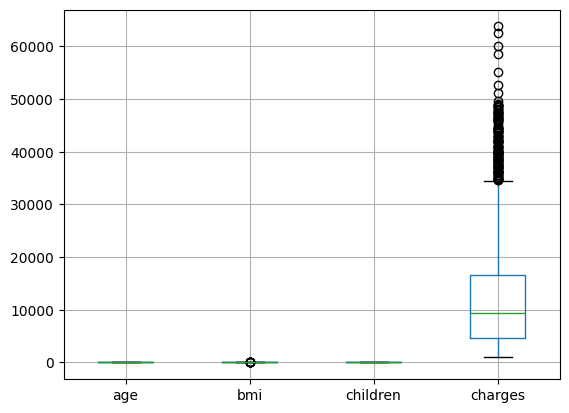

In [24]:
datos.boxplot()

Axes(0.125,0.11;0.62x0.77)


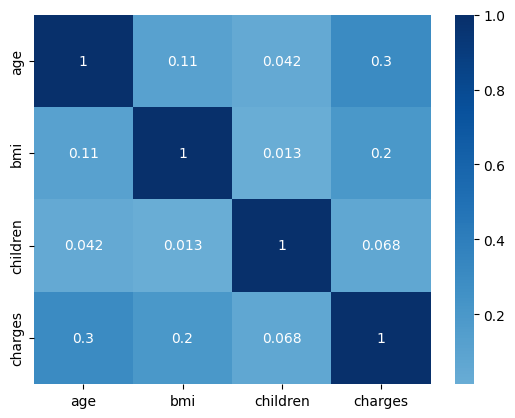

In [25]:
#Se calcula la matriz de correlación
print(sns.heatmap(datos.select_dtypes(include='number').corr(), annot=True, cmap="Blues", center=0))

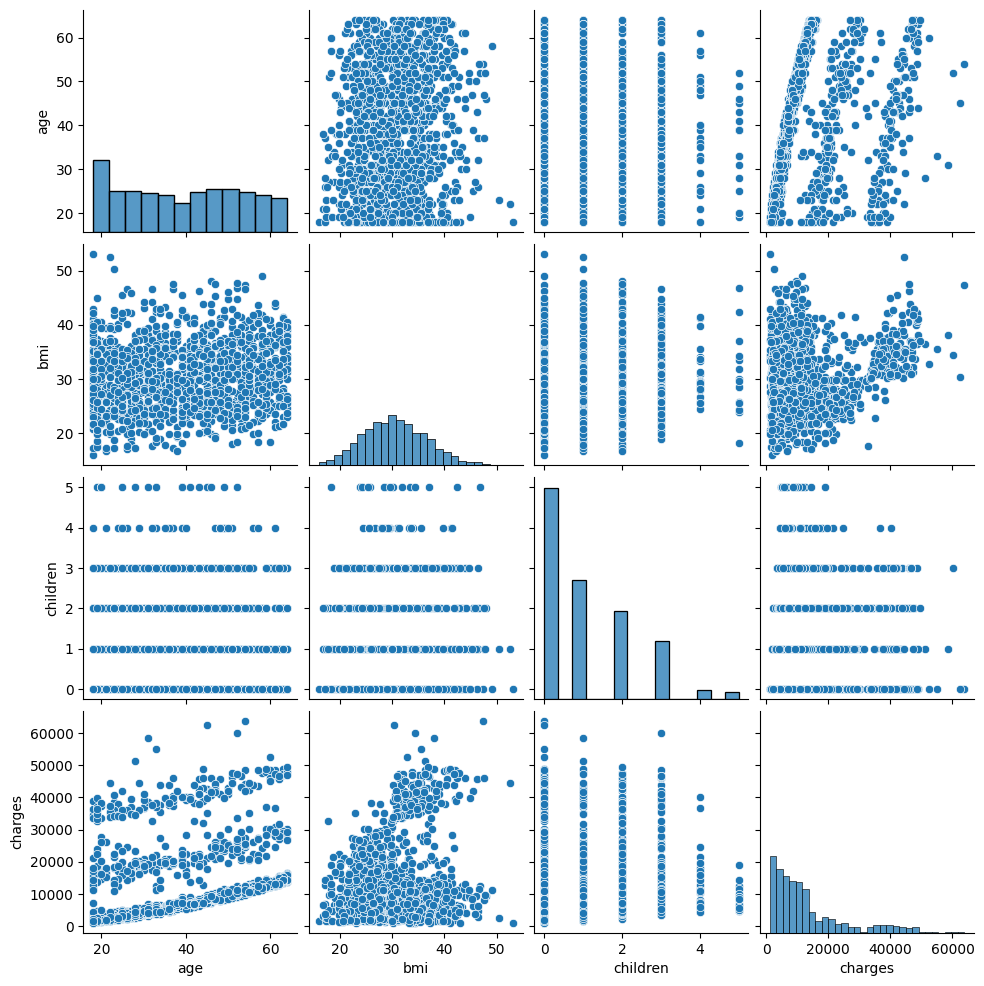

In [26]:
sns.pairplot(datos)


 Temperatura del aire (°C)


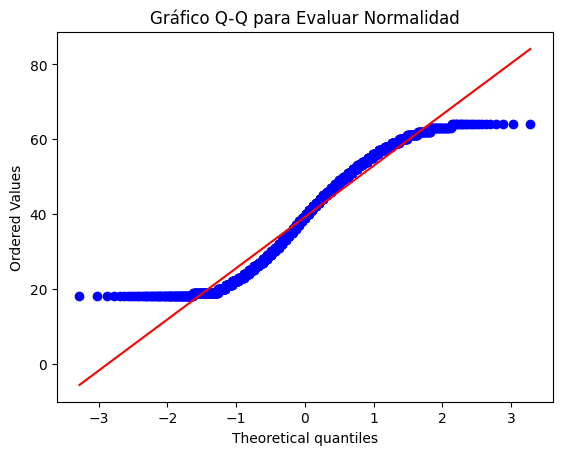


 Temperatura de superficie terrestre (°C)


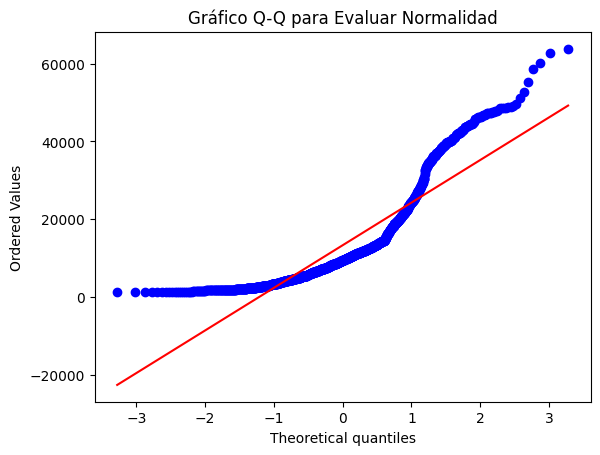

In [27]:
# Q-Q Plot
st.probplot(datos['age'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Temperatura del aire (°C)')
plt.show()

st.probplot(datos['charges'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Temperatura de superficie terrestre (°C)')
plt.show()  

In [28]:
# Prueba de Shapiro-Wilk, esta prueba nos permite saber si los datos siguen una distribución normal a través de una prueba de hipotesis
alfa = 0.05  # Nivel de significancia
estadistico1, valor_p1 = st.shapiro(datos['age'])
estadistico2, valor_p2 = st.shapiro(datos['charges'])

# Mostrar resultados para variable 't2m'
print("Variable: t2m")
print(f"Estadístico de prueba: {estadistico1:.4f}")
print(f"Valor p: {valor_p1:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable t2m sigue una distribución normal.')
print('H_1: La variable t2m no sigue una distribución normal.')
if valor_p1 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.", '\n')
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.", '\n')

# Mostrar resultados para variable 'skt'
print("Variable: skt")
print(f"Estadístico de prueba: {estadistico2:.4f}")
print(f"Valor p: {valor_p2:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable skt sigue una distribución normal.')
print('H_1: La variable stk no sigue una distribución normal.')
if valor_p2 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

Variable: t2m
Estadístico de prueba: 0.9447
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable t2m sigue una distribución normal.
H_1: La variable t2m no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: skt
Estadístico de prueba: 0.8147
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable skt sigue una distribución normal.
H_1: La variable stk no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
